In [ ]:
import yfinance as yf # For downloading financial data from Yahoo Finance
import pandas as pd# For data manipulation and analysis
import numpy as np# For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns # For statistical data visualization
import warnings as warn
warn.filterwarnings('ignore')

In [ ]:
import yfinance as yf# For downloading financial data from Yahoo Finance
import pandas as pd# For data manipulation and analysis
import numpy as np# For numerical operations
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns# For statistical data visualization
import warnings as warn
warn.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
!pip install yfinance

In [ ]:
btc_cc = yf.download("BTC-USD", start="2014-09-17", end="2025-03-31", auto_adjust=False)
btc_cc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2025-03-26,86900.882812,86900.882812,88292.156250,85861.453125,87460.234375,26704046038
2025-03-27,87177.101562,87177.101562,87786.726562,85837.937500,86896.257812,24413471941


In [ ]:
# Cleaning the multi-level column names
btc_cc.reset_index(inplace=True)
btc_cc.columns = ['_'.join(filter(None, column_name)).strip() if isinstance(column_name, tuple) else column_name for column_name in btc_cc.columns]
btc_cc.columns = [column_name.replace('_BTC-USD', '') for column_name in btc_cc.columns]
btc_cc

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...,...
3843,2025-03-26,86900.882812,86900.882812,88292.156250,85861.453125,87460.234375,26704046038
3844,2025-03-27,87177.101562,87177.101562,87786.726562,85837.937500,86896.257812,24413471941
3845,2025-03-28,84353.148438,84353.148438,87489.859375,83557.640625,87185.234375,34198619509
3846,2025-03-29,82597.585938,82597.585938,84567.335938,81634.140625,84352.070312,16969396135


In [ ]:
btc_cc.to_csv('btc_usd.csv', index=False)

In [ ]:
btc_cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3908 non-null   datetime64[ns]
 1   Adj Close  3908 non-null   float64       
 2   Close      3908 non-null   float64       
 3   High       3908 non-null   float64       
 4   Low        3908 non-null   float64       
 5   Open       3908 non-null   float64       
 6   Volume     3908 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 213.8 KB


In [ ]:
first_date = btc_cc['Date'].min()
last_date = btc_cc['Date'].max()

print("First trading date in this BTC historical data:", first_date.date())
print("Last trading date in this BTC historical data:", last_date.date())

First trading date in this BTC historical data: 2014-09-17
Last trading date in this BTC historical data: 2025-03-30


In [ ]:
print("Minimum BTC Closing Price:", btc_cc['Close'].min())
print("Maximum BTC Closing Price:", btc_cc['Close'].max())
print("Minimum BTC Opening Price:", btc_cc['Open'].min())
print("Maximum BTC Opening Price:", btc_cc['Open'].max())
print("Lowest recorded BTC high price:", btc_cc['High'].min())
print("Highest recorded BTC high price:", btc_cc['High'].max())
print("Lowest recorded BTC low price:", btc_cc['Low'].min())
print("Highest recorded BTC low price:", btc_cc['Low'].max())
print("Lowest recorded BTC trading volume:", btc_cc['Volume'].min())
print("Highest recorded BTC trading volume:", btc_cc['Volume'].max())

Minimum BTC Closing Price: 178.10299682617188
Maximum BTC Closing Price: 106146.265625
Minimum BTC Opening Price: 176.89700317382812
Maximum BTC Opening Price: 106147.296875
Lowest recorded BTC high price: 211.7310028076172
Highest recorded BTC high price: 109114.8828125
Lowest recorded BTC low price: 171.50999450683594
Highest recorded BTC low price: 105291.734375
Lowest recorded BTC trading volume: 5914570
Highest recorded BTC trading volume: 350967941479


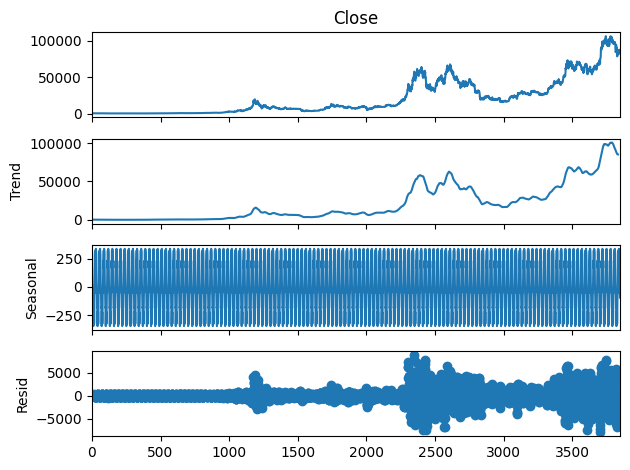

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom = seasonal_decompose(btc_cc['Close'], model='additive', period=30)  # 30 days for monthly pattern
decom.plot()
plt.show()

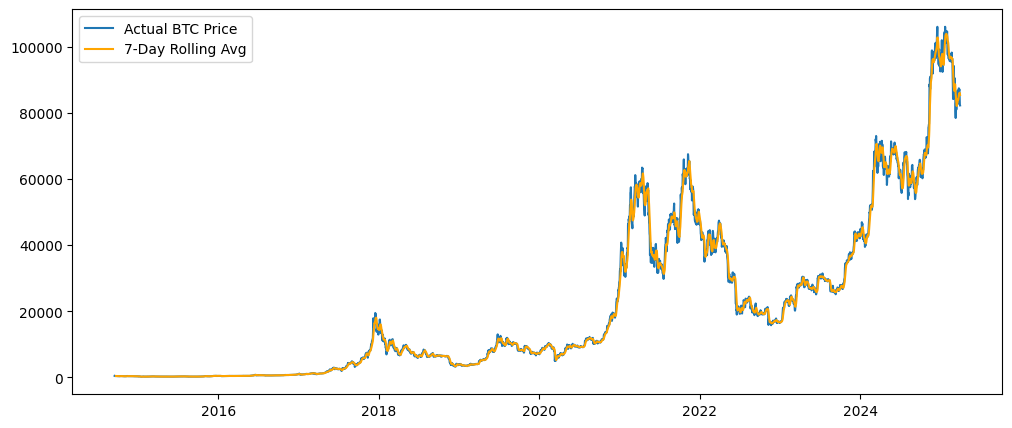

In [ ]:
btc_cc['Rolling_7'] = btc_cc['Close'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(btc_cc['Date'], btc_cc['Close'], label='Actual BTC Price')
plt.plot(btc_cc['Date'], btc_cc['Rolling_7'], label='7-Day Rolling Avg', color='orange')
plt.legend()
plt.show()

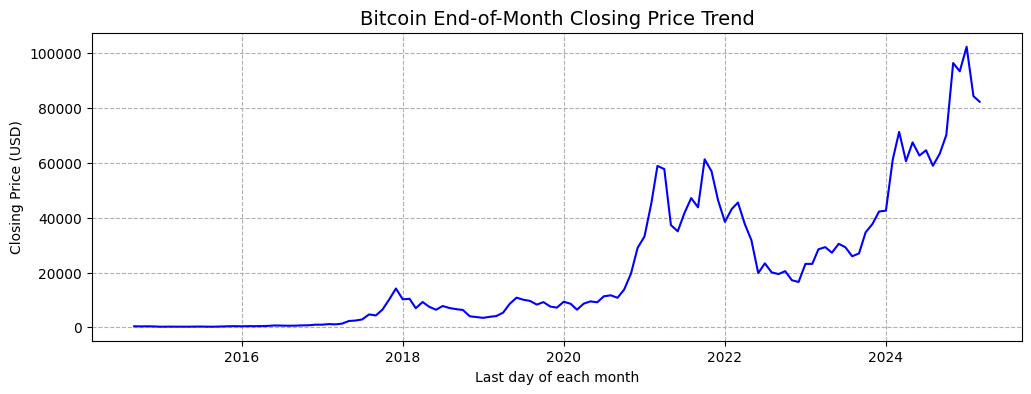

In [ ]:
# Creating a new column for Year-Month and keeping the last entry of each month
btc_cc['YearMonth'] = btc_cc['Date'].dt.to_period('M')
monthly_data = btc_cc.groupby('YearMonth').last().reset_index()

# Converting YearMonth back to datetime for plotting
monthly_data['Date'] = monthly_data['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 4))
plt.plot(monthly_data['Date'], monthly_data['Close'], color='blue')
plt.title('Bitcoin End-of-Month Closing Price Trend', fontsize=14)
plt.xlabel('Last day of each month')
plt.ylabel('Closing Price (USD)')
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

# Grouping the data by year & month, and getting the last entry of each month
month_end_data = btc_cc.groupby([btc_cc['Date'].dt.to_period('M')]).agg({
    'Date': 'last', 'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'
    }).reset_index(drop=True)

# Creating the candlestick chart
Chart = go.Figure(data=[go.Candlestick(x=month_end_data['Date'],
                                       open=month_end_data['Open'],
                                       high=month_end_data['High'],
                                       low=month_end_data['Low'],
                                       close=month_end_data['Close'],
                                       increasing_line_color='green',
                                       decreasing_line_color='red')])

Chart.update_layout(title='Candlestick Chart - Monthly BTC Price',
                    xaxis_title='Last day of each month',
                    yaxis_title='BTC Price (USD)',
                    xaxis_rangeslider_visible=False)
Chart.show()

In [ ]:
feb_mar = btc_cc[(btc_cc['Date'] >= '2025-02-01') & (btc_cc['Date'] <= '2025-03-31')]

# Creating the candlestick chart
Chart = go.Figure(data=[go.Candlestick(x=feb_mar['Date'],
                                       open=feb_mar['Open'],
                                       high=feb_mar['High'],
                                       low=feb_mar['Low'],
                                       close=feb_mar['Close'],
                                       increasing_line_color='green',
                                       decreasing_line_color='red')])

Chart.update_layout(title='Candlestick Chart - Daily BTC Price- Feb & March 2025',
                    xaxis_title='Date',
                    yaxis_title='BTC Price (USD)',
                    xaxis_rangeslider_visible=False)
Chart.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Extracting the closing btc price series
closing_series = btc_cc['Close']

#Making the btc series to stationary (apply differencing if needed)
def btc_stationary(series, max_diffs=2):
    initial_btc_series = series.dropna().copy()
    difference_applied = 0

    for i in range(max_diffs + 1):
        result = adfuller(initial_btc_series)
        p_value = result[1]

        print(f"\nAugmented Dickey-Fuller (ADF) Test{i+1}:")
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {p_value:.4f}")
        if p_value <= 0.05:
            print("Bitcoin series is now stationary")
            return initial_btc_series, difference_applied
        elif i < max_diffs:
            print("Bitcoin series is not stationary. Applying differencing...")
            initial_btc_series = pd.Series(np.diff(initial_btc_series), index=initial_btc_series.index[1:])
            difference_applied += 1

    raise ValueError("Could not make the Bitcoin series stationary")

try:
    print("Checking stationarity of original BTC closing price series...")
    close_stationary, difference_needed = btc_stationary(btc_cc['Close'])

    print(f"\n Successfully made series stationary with {difference_needed} difference(s)")
    print("Proceeding with next steps...")

    # Replace the original closing prices with the stationary version
    btc_cc = btc_cc.iloc[difference_needed:]  # Align with differencing
    btc_cc['Close'] = close_stationary.values

except ValueError as e:
    print(f"\n Error: {e}")
    print(" Cannot proceed with analysis - Bitcoin series is not stationary")

Checking stationarity of original BTC closing price series...

Augmented Dickey-Fuller (ADF) Test1:
ADF Statistic: -0.5211
p-value: 0.8878
Bitcoin series is not stationary. Applying differencing...

Augmented Dickey-Fuller (ADF) Test2:
ADF Statistic: -9.2114
p-value: 0.0000
Bitcoin series is now stationary

 Successfully made series stationary with 1 difference(s)
Proceeding with next steps...


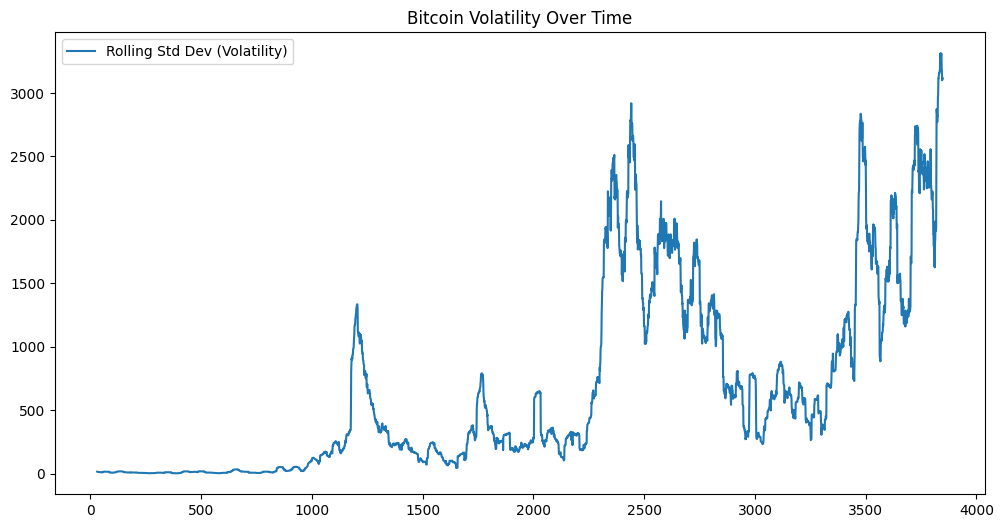

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(btc_cc['Close'].rolling(window=30).std(), label='Rolling Std Dev (Volatility)')
plt.title('Bitcoin Volatility Over Time')
plt.legend()
plt.show()


In [ ]:
closing_prices = btc_cc['Close'].values
dates = btc_cc['Date'].values

# In this code 10 previous days will be used to predict the next day's price
window_size = 10

# Preparing the input (X), target (y), and target date using a sliding window
X, y, y_dates = [], [], []
for current_day_index in range(window_size, len(closing_prices)):
    ten_days_window = closing_prices[current_day_index - window_size:current_day_index]  # previous 10 days
    target_day = closing_prices[current_day_index]  # next day's price
    target_date = dates[current_day_index]  # next day's date

    X.append(ten_days_window)
    y.append(target_day)
    y_dates.append(target_date)

X = np.array(X)
y = np.array(y)
y_dates = np.array(y_dates)

print(f"Input shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print("Example input:", X[0])
print("Expected output:", y[0])

# Reshaping X
X = X.reshape((X.shape[0], X.shape[1], 1))
print(f"Reshaped input for LSTM: {X.shape}")

Input shape (X): (3837, 10)
Target shape (y): (3837,)
Example input: [-32.89401245 -29.64401245  14.10800171 -10.08297729   3.33099365
  33.63897705 -12.58599854 -11.63098145  -7.14901733  -4.90499878]
Expected output: -22.3389892578125
Reshaped input for LSTM: (3837, 10, 1)


In [ ]:
split_date = np.datetime64('2025-01-01')
before_split_date = y_dates < split_date
from_2025_onward = y_dates >= split_date

# Splitting the dataset in to training and testing
X_train, X_test = X[before_split_date], X[from_2025_onward]
y_train, y_test = y[before_split_date], y[from_2025_onward]

print(f"\nTraining set of BTC closing prices:  X = {X_train.shape},  y = {y_train.shape}")
print(f"Testing set of BTC closing prices:   X = {X_test.shape},   y = {y_test.shape}")


Training set of BTC closing prices:  X = (3748, 10, 1),  y = (3748,)
Testing set of BTC closing prices:   X = (89, 10, 1),   y = (89,)


In [ ]:
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

x_scaler = RobustScaler()
X_train_scaled = x_scaler.fit_transform(X_train_reshaped)
X_test_scaled = x_scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

y_scaler = RobustScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
X_train_scaled

array([[[-1.35682477e-01],
        [-1.22907278e-01],
        [ 4.90744711e-02],
        ...,
        [-5.21011073e-02],
        [-3.44832664e-02],
        [-2.56624099e-02]],

       [[-1.22907278e-01],
        [ 4.90744711e-02],
        [-4.60161655e-02],
        ...,
        [-3.44832664e-02],
        [-2.56624099e-02],
        [-9.41924703e-02]],

       [[ 4.90744711e-02],
        [-4.60161655e-02],
        [ 6.71187977e-03],
        ...,
        [-2.56624099e-02],
        [-9.41924703e-02],
        [-1.31190926e-02]],

       ...,

       [[-1.00323025e+01],
        [ 1.03519625e+00],
        [-2.09445110e+00],
        ...,
        [-1.37787524e+01],
        [-6.41621491e+00],
        [ 3.92079430e+00]],

       [[ 1.03519625e+00],
        [-2.09445110e+00],
        [-8.33891306e+00],
        ...,
        [-6.41621491e+00],
        [ 3.92079430e+00],
        [-6.42819166e+00]],

       [[-2.09445110e+00],
        [-8.33891306e+00],
        [-1.65220197e+00],
        ...,
        

In [ ]:
y_test_scaled

array([  3.85354812,   9.60726834,   4.74978898,   0.49553695,
         0.30045844,  14.65742122, -20.09532293,  -7.32894414,
        -9.97988701,   8.63425032,  -0.5318522 ,  -0.31089717,
         0.1030967 ,   7.85533664,  15.46528616,  -2.91946344,
        18.32814251,  -0.21664575, -12.93739054,   3.6061077 ,
        16.08547023,  -9.72157846,   1.19033673,   3.34213676,
        -0.41485989,  -7.92501737,  -2.32415127,  -2.94917577,
         9.23169349,   4.01541336,  -9.08675133,  -6.82212967,
       -11.56757892,  14.47552451, -13.77572888,  -4.90206148,
        -0.09265156,  -0.25655648,  -0.18805981,   0.06239446,
         3.64665773,  -6.59225485,   8.32647195,  -4.92394997,
         3.44262899,   0.27181161,  -5.48245659,  -1.57144898,
        -0.91753411,   4.26468035,   6.61152845,  -8.6117802 ,
         1.75578434,  -1.19030307, -18.92774392, -10.45729358,
       -17.10953789,   1.38556745,  -1.29700566,   6.45791326,
        32.01064142, -31.89178888,   4.50027845,  13.24

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 10.5926 - mae: 1.4976 - val_loss: 28.8702 - val_mae: 3.3899
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 10.5278 - mae: 1.4459 - val_loss: 28.7816 - val_mae: 3.3736
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 11.0298 - mae: 1.4976 - val_loss: 28.7994 - val_mae: 3.3839
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 10.8001 - mae: 1.4824 - val_loss: 28.8592 - val_mae: 3.3906
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 8.9825 - mae: 1.3500 - val_loss: 28.9290 - val_mae: 3.4000
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 9.3313 - mae: 1.4065 - val_loss: 28.8959 - val_mae: 3.4087
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 9.1993 - mae: 1.4170 - val_loss: 29.0606 - val_mae: 3.4300
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 8.3766 - mae: 1.3225 - val_loss: 28.8377 - val_mae: 3.3990
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step 

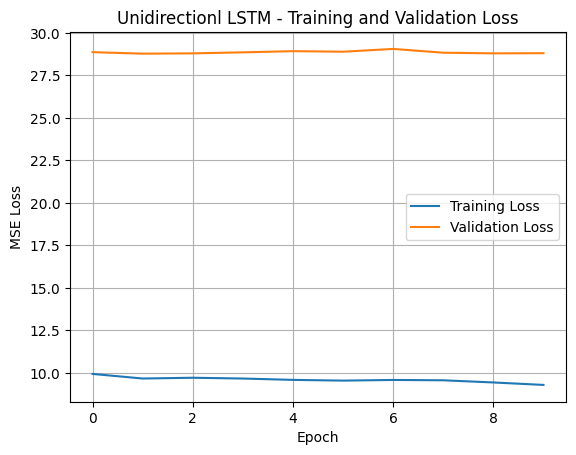

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

 Metrics: Unidirectional LSTM:
MAE  - 5477.8080
MSE  - 41831637.1595
RMSE - 6467.7382
R²   - 0.2237
MAPE - 94.80%



In [ ]:
# Building Uni-directional LSTM model for next-day price prediction
Uni_LSTM = Sequential()
Uni_LSTM.add(LSTM(300, activation='selu', input_shape=(window_size, 1)))
Uni_LSTM.add(Dense(1))
Uni_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Training the Uni-LSTM model
history_uni_lstm = Uni_LSTM.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Plotting training and validation loss over epochs
plt.plot(history_uni_lstm.history['loss'], label='Training Loss')
plt.plot(history_uni_lstm.history['val_loss'], label='Validation Loss')
plt.title('Unidirectionl LSTM - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

#Predicting the closing price of BTC
y_pred = Uni_LSTM.predict(X_test_scaled).flatten()

# Inverse scaling
y_test_inverse = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inverse = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Inverse differencing
last_train_price = btc_cc['Close'].iloc[len(btc_cc) - len(y_test_inverse) - 1]
y_pred_inverse = np.r_[last_train_price, y_pred_inverse].cumsum()[1:]
y_test_inverse = np.r_[last_train_price, y_test_inverse].cumsum()[1:]

print(f"\n Metrics: Unidirectional LSTM:")
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"MAE  - {mae:.4f}")
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"MSE  - {mse:.4f}")
rmse = math.sqrt(mse)
print(f"RMSE - {rmse:.4f}")
r2 = r2_score(y_test_inverse, y_pred_inverse)
print(f"R²   - {r2:.4f}")
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse) * 100
print(f"MAPE - {mape:.2f}%\n")


Some test predictions of Unidirectionl LSTM

Sample 1
Last 10 days input (closing btc price): [ -8.33891306  -1.65220197  15.67704827   2.4429249  -13.77875244
  -6.41621491   3.9207943   -6.42819166  -3.49308971   3.08322032]
Actual BTC closing price      : 1776.546875
Predicted BTC closing price   : 646.3341674804688

Sample 2
Last 10 days input (closing btc price): [ -1.65220197  15.67704827   2.4429249  -13.77875244  -6.41621491
   3.9207943   -6.42819166  -3.49308971   3.08322032   3.88732082]
Actual BTC closing price      : 4243.6640625
Predicted BTC closing price   : 555.3290634155273

Sample 3
Last 10 days input (closing btc price): [ 15.67704827   2.4429249  -13.77875244  -6.41621491   3.9207943
  -6.42819166  -3.49308971   3.08322032   3.88732082   9.69143764]
Actual BTC closing price      : 5464.21875
Predicted BTC closing price   : 595.6659240722656

Sample 4
Last 10 days input (closing btc price): [  2.4429249  -13.77875244  -6.41621491   3.9207943   -6.42819166
  -3.4930

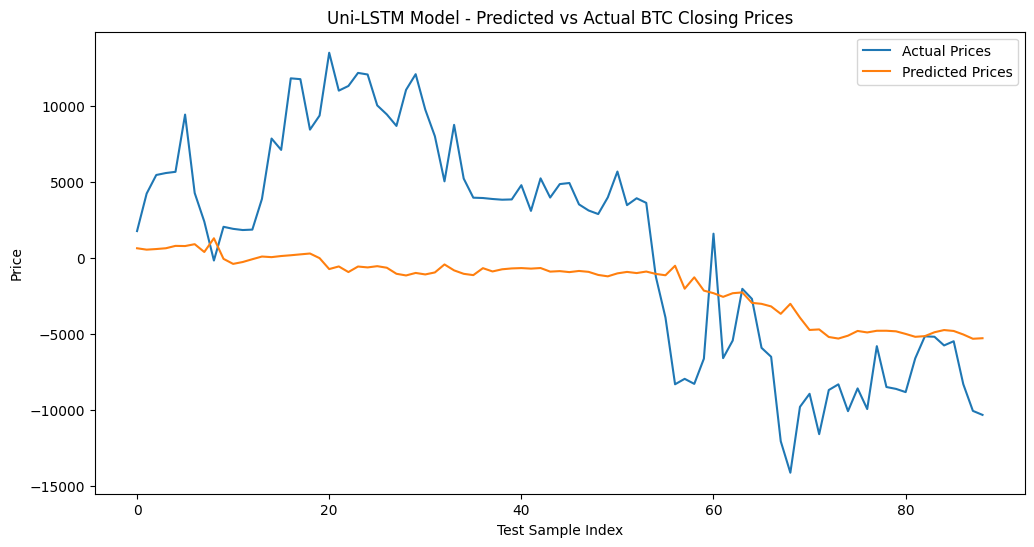

In [ ]:
print("\nSome test predictions of Unidirectionl LSTM\n")

for day_index in range(5):
    print(f"Sample {day_index+1}")
    print("Last 10 days input (closing btc price):", X_test_scaled[day_index].flatten())
    print(f"Actual BTC closing price      : {y_test_inverse[day_index]}")
    print(f"Predicted BTC closing price   : {y_pred_inverse[day_index]}\n")

# Plotting actual vs predicted prices on test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices')
plt.plot(y_pred_inverse, label='Predicted Prices')
plt.title('Uni-LSTM Model - Predicted vs Actual BTC Closing Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - loss: 9.9459 - mae: 1.4630 - val_loss: 28.7831 - val_mae: 3.3897
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 9.4836 - mae: 1.4445 - val_loss: 28.6517 - val_mae: 3.3696
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 9.4733 - mae: 1.4225 - val_loss: 29.0691 - val_mae: 3.3970
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 9.4304 - mae: 1.3651 - val_loss: 28.6727 - val_mae: 3.3972
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 9.9493 - mae: 1.4860 - val_loss: 28.8398 - val_mae: 3.3880
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 9.0597 - mae: 1.3636 - val_loss: 28.8770 - val_mae: 3.3898
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 8.7932 - mae: 1.3531 - val_loss: 28.6990 - val_mae: 3.3698
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 9.4996 - mae: 1.3941 - val_loss: 28.7873 - val_mae: 3.3766
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/st

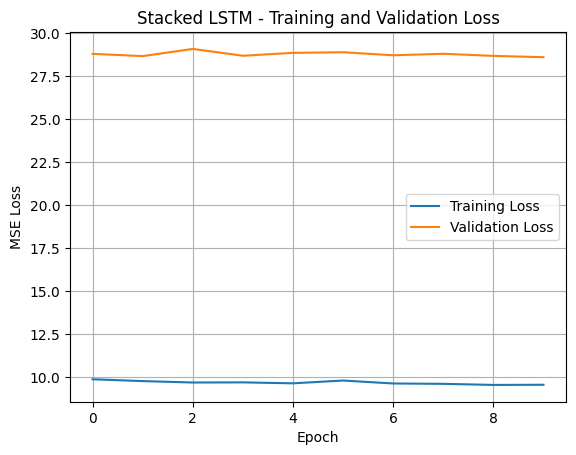

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step

 Metrics: Stacked LSTM:
MAE  - 6331.2686
MSE  - 51440411.8942
RMSE - 7172.1971
R²   - 0.0453
MAPE - 99.28%



In [ ]:
# Building Stacked LSTM model for next-day price prediction
stacked_LSTM = Sequential()
stacked_LSTM.add(LSTM(300, activation='selu', return_sequences=True, input_shape=(window_size, 1)))
stacked_LSTM.add(LSTM(150, activation='selu'))
stacked_LSTM.add(Dense(1))
stacked_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Training the Stacked LSTM model
history_stacked_lstm = stacked_LSTM.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Plotting training and validation loss over epochs
plt.plot(history_stacked_lstm.history['loss'], label='Training Loss')
plt.plot(history_stacked_lstm.history['val_loss'], label='Validation Loss')
plt.title('Stacked LSTM - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

#Predicting the closing price of BTC
y_pred = stacked_LSTM.predict(X_test_scaled).flatten()

# Inverse scaling
y_test_inverse = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inverse = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Inverse differencing
last_train_price = btc_cc['Close'].iloc[len(btc_cc) - len(y_test_inverse) - 1]
y_pred_inverse = np.r_[last_train_price, y_pred_inverse].cumsum()[1:]
y_test_inverse = np.r_[last_train_price, y_test_inverse].cumsum()[1:]

print(f"\n Metrics: Stacked LSTM:")
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"MAE  - {mae:.4f}")
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"MSE  - {mse:.4f}")
rmse = math.sqrt(mse)
print(f"RMSE - {rmse:.4f}")
r2 = r2_score(y_test_inverse, y_pred_inverse)
print(f"R²   - {r2:.4f}")
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse) * 100
print(f"MAPE - {mape:.2f}%\n")


Checking some test predictions - Stacked LSTM

Sample 1
Last 10 days input (closing price): [ -8.33891306  -1.65220197  15.67704827   2.4429249  -13.77875244
  -6.41621491   3.9207943   -6.42819166  -3.49308971   3.08322032]
Actual BTC closing price      : 1776.546875
Predicted BTC closing price   : 648.7581329345703

Sample 2
Last 10 days input (closing price): [ -1.65220197  15.67704827   2.4429249  -13.77875244  -6.41621491
   3.9207943   -6.42819166  -3.49308971   3.08322032   3.88732082]
Actual BTC closing price      : 4243.6640625
Predicted BTC closing price   : 609.8810577392578

Sample 3
Last 10 days input (closing price): [ 15.67704827   2.4429249  -13.77875244  -6.41621491   3.9207943
  -6.42819166  -3.49308971   3.08322032   3.88732082   9.69143764]
Actual BTC closing price      : 5464.21875
Predicted BTC closing price   : 448.28216552734375

Sample 4
Last 10 days input (closing price): [  2.4429249  -13.77875244  -6.41621491   3.9207943   -6.42819166
  -3.49308971   3.0832

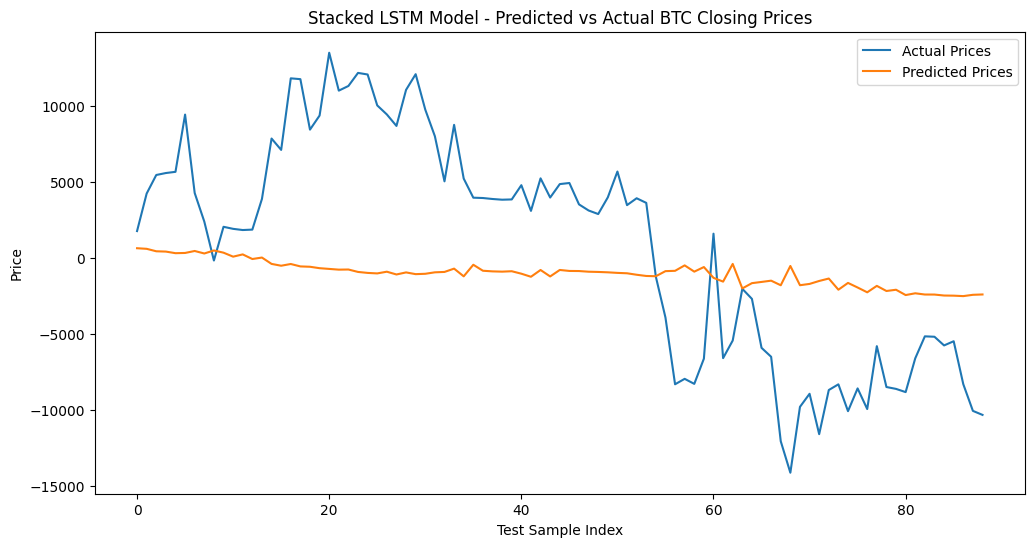

In [44]:
print("\nChecking some test predictions - Stacked LSTM\n")

for day_index in range(5):
    print(f"Sample {day_index+1}")
    print("Last 10 days input (closing price):", X_test_scaled[day_index].flatten())
    print(f"Actual BTC closing price      : {y_test_inverse[day_index]}")
    print(f"Predicted BTC closing price   : {y_pred_inverse[day_index]}\n")

# Plotting actual vs predicted prices on test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices')
plt.plot(y_pred_inverse, label='Predicted Prices')
plt.title('Stacked LSTM Model - Predicted vs Actual BTC Closing Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()